# Overview
This is our teams first attempt to explore the MTA Data!!

-  Stations with maximum traffic 
    - Traffic = Entries + Exit
-  Aggregated Traffic by Month for all stations
-  Aggregate data by time across stations
-  Office Locations by Stations
-  Explore data for 2 years
-  Cleaning Data
    -  See if there any nulls
    -  See if the station names have errors
    
    


Below are some Maps and images for visual reference:
<img src="MTA_RAIL_MAP.jpg" width="500" height="600"></img>
<img src="TechCompany_MAP.png" width="500" height="600"></img>

|S.No |Neighborhood   |  %|
|------|--------------|----| 
|1.| Financial District|    39%|
|2.| Midtown South|    32%|
|3.| Turtle Bay|    31%|
|4.| Murray Hill|    30%|
|5.| Noho|    30%||
|6.| Fulton/Seaport |   29%|
|8.| Greenwich Village |   28%|
|9.| Upper East Side|    27.5%
|10.| Kips Bay|    27%|
|11.| Chelsea|    27%|
|12.| West Chelsea|    27%|
|13.| Hunters Point|    26%|
|14.| Jamaica Estates|    26%|
|15.| Yorkville|    26%|

In [1]:
# import the python libraries
import pandas as pd
import numpy as np
import math


In [2]:
# This file is a merged across the two years of MTA Turnstile data
#The data file is merged using shell script
# The files were downloaded, scraped and Cleaned using a mix of Beautiful Soup and Shell Script SED commands
# This is relatively a large file
mta_data = pd.read_csv("merged_file.txt")

In [3]:
# Sample Reference for a single file
mta_data_1df = pd.read_csv("turnstile_190330.txt")

## Exploring the Data

The next steps we will explore the data to get a better understanding of the data

In [4]:
# Lets look at the
mta_data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,03:00:00,REGULAR,6463109,2187558
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,07:00:00,REGULAR,6463119,2187567
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,11:00:00,REGULAR,6463178,2187654
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,15:00:00,REGULAR,6463373,2187736
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,19:00:00,REGULAR,6463712,2187803


In [5]:
mta_data = mta_data.sort_values(by="DATE", ascending=True)

In [6]:
len(mta_data)

10346286

In [7]:
# Looking at the Stations, it may be easiest to place 
stations = mta_data["STATION"].unique()
stations_1df = mta_data_1df["STATION"].unique()

In [8]:
# Print the number of Stations
print(len(stations), len(stations_1df))

379 377


In [9]:
stations_1df_set = set(stations_1df)
station_set =  set(stations)
station_set.difference(stations_1df_set)

{'ASTORIA BLVD', 'ORCHARD BEACH'}

In [10]:
mta_cleaned_data = mta_data[(mta_data.EXITS != 0) | (mta_data.ENTRIES != 0)]

### Group by


In [11]:
mta_entries_exit_by_station = mta_cleaned_data.groupby(['STATION'])[["ENTRIES","EXITS"]].agg('sum')

In [12]:
mta_cleaned_data.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [13]:
mta_entries_exit_by_station.head()

,ENTRIES,EXITS
STATION,,
1 AV,6278971186328,3536493640442
103 ST,442069899749,1406692207877
103 ST-CORONA,146024444901,149906268058
104 ST,10595786665982,7701347630057
110 ST,77315850692,74754297468


In [14]:
mta_entries_exit_by_station.sort_values(by="ENTRIES", ascending=False).head(10)

,ENTRIES,EXITS
STATION,,
42 ST-PORT AUTH,16828740462843,13744032052758
23 ST,13321602809454,14827887044990
TIMES SQ-42 ST,12910320237132,10022219506020
CANAL ST,12611684827065,13019237465731
34 ST-HERALD SQ,11914849351701,15360594926974
CHAMBERS ST,11156245512265,9780314452762
125 ST,10610710045989,5641680603273
104 ST,10595786665982,7701347630057
14 ST,10127543642334,7169198651179


In [15]:
mta_entries_exit_by_station.sort_values(by="EXITS", ascending=False).head(10)

,ENTRIES,EXITS
STATION,,
34 ST-HERALD SQ,11914849351701,15360594926974
23 ST,13321602809454,14827887044990
42 ST-PORT AUTH,16828740462843,13744032052758
CANAL ST,12611684827065,13019237465731
72 ST,7895307420579,10394786470178
TIMES SQ-42 ST,12910320237132,10022219506020
CHAMBERS ST,11156245512265,9780314452762
FULTON ST,9482158762720,9549060309270
HIGH ST,6046892240570,8134440530949


In [16]:
mta_cleaned_data['TOTAL'] = mta_cleaned_data['ENTRIES'] + mta_cleaned_data['EXITS']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
mta_total_by_station = mta_cleaned_data.groupby(['STATION'], as_index=False)[["TOTAL"]].agg('sum')

In [18]:
mta_top_10_stations = mta_total_by_station.sort_values(by="TOTAL", ascending=False).head(10)
mta_top_10_stations

,STATION,TOTAL
68,42 ST-PORT AUTH,30572772515601
46,23 ST,28149489854444
59,34 ST-HERALD SQ,27275444278675
173,CANAL ST,25630922292796
353,TIMES SQ-42 ST,22932539743152
180,CHAMBERS ST,20936559965027
226,FULTON ST,19031219071990
3,104 ST,18297134296039
97,72 ST,18290093890757
13,14 ST,17296742293513


## Graphing

This is to graph the data

* !pip install seaborn

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [21]:
mta_total_by_station

,STATION,TOTAL
0,1 AV,9815464826770
1,103 ST,1848762107626
2,103 ST-CORONA,295930712959
3,104 ST,18297134296039
4,110 ST,152070148160
5,111 ST,395570765925
6,116 ST,7280996156929
7,116 ST-COLUMBIA,3271327532157
8,121 ST,1452666019019
9,125 ST,16252390649262


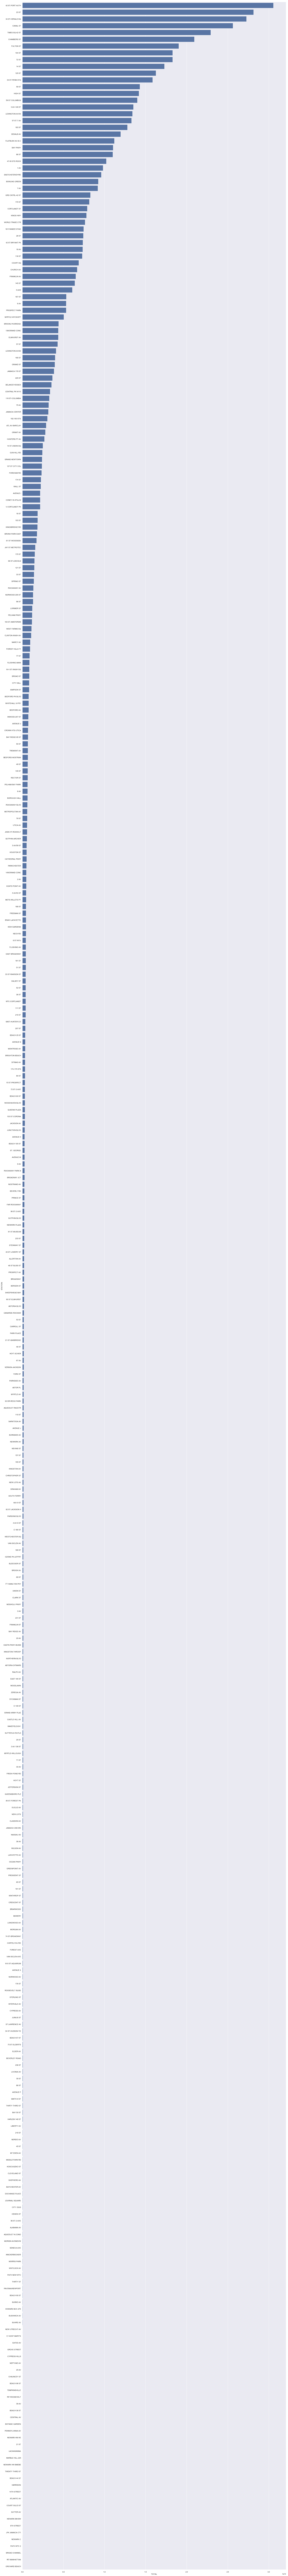

In [22]:
plt.figure(figsize=(30,300))
mta_total_by_station = mta_total_by_station.sort_values(by="TOTAL", ascending=False)
sns.barplot(y='STATION', x='TOTAL', data=mta_total_by_station, color='b');

In [23]:
mta_top_10_stations

,STATION,TOTAL
68,42 ST-PORT AUTH,30572772515601
46,23 ST,28149489854444
59,34 ST-HERALD SQ,27275444278675
173,CANAL ST,25630922292796
353,TIMES SQ-42 ST,22932539743152
180,CHAMBERS ST,20936559965027
226,FULTON ST,19031219071990
3,104 ST,18297134296039
97,72 ST,18290093890757
13,14 ST,17296742293513


In [24]:
mta_cleaned_data.describe()

,ENTRIES,EXITS,TOTAL
count,1.034446e+07,1.034446e+07,1.034446e+07
mean,3.994771e+07,3.279000e+07,7.273771e+07
std,2.070538e+08,1.912516e+08,3.773676e+08
min,0.000000e+00,0.000000e+00,1.000000e+00
25%,4.801810e+05,2.286080e+05,8.905172e+05
50%,2.498764e+06,1.413961e+06,4.710246e+06
75%,6.904690e+06,4.810978e+06,1.241259e+07
max,2.144893e+09,2.146093e+09,3.968876e+09


In [25]:
list(mta_cleaned_data)

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS',
 'TOTAL']

#### Cleaning Data : Removing the bad date

In [26]:
valid_time_list = []
for i in mta_cleaned_data["TIME"].unique():
    if (i.split(":")[1] == "00" and i.split(":")[2] =="00"):
        valid_time_list.append(i)

mta_cleaned_data_filtered_valida_date = mta_cleaned_data.loc[mta_cleaned_data["TIME"].isin(valid_time_list)]       

In [27]:
mta_cleaned_data_filtered_valida_date["TIME"].unique()

array(['03:00:00', '20:00:00', '04:00:00', '00:00:00', '08:00:00',
       '23:00:00', '19:00:00', '15:00:00', '11:00:00', '07:00:00',
       '12:00:00', '16:00:00', '01:00:00', '05:00:00', '09:00:00',
       '13:00:00', '17:00:00', '21:00:00', '22:00:00', '18:00:00',
       '14:00:00', '10:00:00', '02:00:00', '06:00:00'], dtype=object)

In [28]:
mta_cleaned_data_filtered_valida_date.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL
33003,H023,R236,00-06-00,DEKALB AV,L,BMT,01/01/2018,03:00:00,REGULAR,1928115856,855931085,2784046941
36910,J003,R352,00-00-02,HEWES ST,JM,BMT,01/01/2018,20:00:00,REGULAR,806307,931961,1738268
159540,R246,R177,00-03-06,68ST-HUNTER CO,6,IRT,01/01/2018,04:00:00,REGULAR,21593199,32770909,54364108
159539,R246,R177,00-03-06,68ST-HUNTER CO,6,IRT,01/01/2018,00:00:00,REGULAR,21593137,32770817,54363954
137808,R160A,R164,00-05-00,66 ST-LINCOLN,1,IRT,01/01/2018,08:00:00,REGULAR,134217762,0,134217762


In [147]:
mta_cleaned_data_filtered_valida_date["ACTUAL_ENTRIES"] = mta_cleaned_data_filtered_valida_date["ENTRIES"].diff()

In [30]:
mta_cleaned_data_filtered_valida_date["ACTUAL_EXITS"] = mta_cleaned_data_filtered_valida_date["EXITS"].diff()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
mta_cleaned_data_filtered_valida_date = mta_cleaned_data_filtered_valida_date[mta_cleaned_data_filtered_valida_date.ACTUAL_EXITS.notnull()]

In [32]:
len(mta_cleaned_data_filtered_valida_date)

9439308

In [33]:
mta_cleaned_data_filtered_valida_date["TOTAL"] = mta_cleaned_data_filtered_valida_date["ACTUAL_ENTRIES"] + mta_cleaned_data_filtered_valida_date["ACTUAL_EXITS"]

In [34]:
mta_cleaned_data_filtered_valida_date

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL,ACTUAL_ENTRIES,ACTUAL_EXITS
36910,J003,R352,00-00-02,HEWES ST,JM,BMT,01/01/2018,20:00:00,REGULAR,806307,931961,-2.782309e+09,-1.927310e+09,-854999124.0
159540,R246,R177,00-03-06,68ST-HUNTER CO,6,IRT,01/01/2018,04:00:00,REGULAR,21593199,32770909,5.262584e+07,2.078689e+07,31838948.0
159539,R246,R177,00-03-06,68ST-HUNTER CO,6,IRT,01/01/2018,00:00:00,REGULAR,21593137,32770817,-1.540000e+02,-6.200000e+01,-92.0
137808,R160A,R164,00-05-00,66 ST-LINCOLN,1,IRT,01/01/2018,08:00:00,REGULAR,134217762,0,7.985381e+07,1.126246e+08,-32770817.0
200593,TRAM2,R469,00-03-00,RIT-ROOSEVELT,R,RIT,01/01/2018,00:00:00,REGULAR,3929944,56739,-1.302311e+08,-1.302878e+08,56739.0
18943,B029,R172,00-00-02,BRIGHTON BEACH,BQ,BMT,01/01/2018,23:00:00,REGULAR,7822479,4196718,8.032514e+06,3.892535e+06,4139979.0
18942,B029,R172,00-00-02,BRIGHTON BEACH,BQ,BMT,01/01/2018,19:00:00,REGULAR,7822436,4196698,-6.300000e+01,-4.300000e+01,-20.0
18941,B029,R172,00-00-02,BRIGHTON BEACH,BQ,BMT,01/01/2018,15:00:00,REGULAR,7822335,4196658,-1.410000e+02,-1.010000e+02,-40.0
18940,B029,R172,00-00-02,BRIGHTON BEACH,BQ,BMT,01/01/2018,11:00:00,REGULAR,7822249,4196625,-1.190000e+02,-8.600000e+01,-33.0
18939,B029,R172,00-00-02,BRIGHTON BEACH,BQ,BMT,01/01/2018,07:00:00,REGULAR,7822182,4196617,-7.500000e+01,-6.700000e+01,-8.0


In [35]:
mta_top_10_stations_cleaned = mta_cleaned_data_filtered_valida_date.groupby(['STATION'], as_index=False)[["TOTAL"]].agg('sum')


In [36]:
mta_top_10_stations_cleaned.sort_values(by="TOTAL", ascending=False).head(10)

,STATION,TOTAL
65,42 ST-PORT AUTH,7.590876e+12
56,34 ST-HERALD SQ,7.158664e+12
3,104 ST,6.613369e+12
43,23 ST,6.579993e+12
169,CANAL ST,6.481008e+12
94,72 ST,5.346972e+12
344,TIMES SQ-42 ST,4.970380e+12
237,HIGH ST,4.809988e+12
32,183 ST,4.777560e+12
81,57 ST-7 AV,4.693381e+12


In [37]:
mta_cleaned_data_filtered_valida_date[mta_cleaned_data["STATION"] == "42 ST-PORT AUTH"]["SCP"].unique()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


array(['01-00-01', '01-00-02', '01-00-00', '01-03-00', '01-00-05',
       '01-05-00', '01-00-03', '01-00-04', '00-00-00', '00-00-01',
       '01-05-01', '00-00-05', '00-05-00', '00-00-04', '00-00-02',
       '00-00-03', '01-03-03', '01-03-02', '01-03-04', '01-03-01',
       '02-06-02', '02-06-01', '02-03-01', '02-06-00', '00-06-01',
       '02-00-01', '02-00-00', '00-05-01', '00-06-00', '02-00-04',
       '02-03-00', '02-00-02', '02-00-03', '00-00-06', '00-00-07',
       '00-00-09', '00-00-08'], dtype=object)

In [38]:
#pd.to_datetime(mta_cleaned_data["TIME"])
import datetime as dt
temp_df = mta_cleaned_data["TIME"].head(10)

time_1 = pd.to_datetime(temp_df, format='%H:%M:%S').dt.time
#dt.time("00:00:00",format='%H:%M:%S')
    

In [39]:
time_1

33003     03:00:00
36910     20:00:00
124603    04:06:39
159540    04:00:00
159539    00:00:00
137808    08:00:00
200593    00:00:00
18943     23:00:00
18942     19:00:00
18941     15:00:00
Name: TIME, dtype: object

In [151]:
mta_cleaned_data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL
33003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
list(time_1)

[datetime.time(3, 0),
 datetime.time(20, 0),
 datetime.time(4, 6, 39),
 datetime.time(4, 0),
 datetime.time(0, 0),
 datetime.time(8, 0),
 datetime.time(0, 0),
 datetime.time(23, 0),
 datetime.time(19, 0),
 datetime.time(15, 0)]

In [50]:
mta_cleaned_data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL
33003,H023,R236,00-06-00,DEKALB AV,L,BMT,01/01/2018,03:00:00,REGULAR,1928115856,855931085,2784046941
36910,J003,R352,00-00-02,HEWES ST,JM,BMT,01/01/2018,20:00:00,REGULAR,806307,931961,1738268
124603,PTH22,R540,00-04-03,PATH NEW WTC,1,PTH,01/01/2018,04:06:39,REGULAR,23203,354609,377812
159540,R246,R177,00-03-06,68ST-HUNTER CO,6,IRT,01/01/2018,04:00:00,REGULAR,21593199,32770909,54364108
159539,R246,R177,00-03-06,68ST-HUNTER CO,6,IRT,01/01/2018,00:00:00,REGULAR,21593137,32770817,54363954


TypeError: unsupported operand type(s) for /: 'str' and 'int'

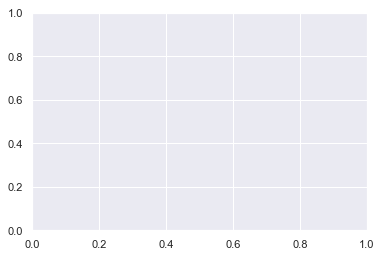

In [44]:
sns.distplot(mta_cleaned_data["TIME"].head())

In [69]:
df_data = mta_cleaned_data["TIME"].head(100)

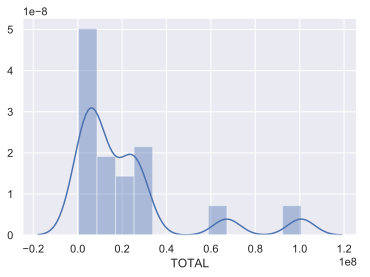

In [70]:
sns.distplot(mta_cleaned_data[mta_cleaned_data["STATION"] == "42 ST-PORT AUTH"]["TOTAL"].head(100))

In [71]:
mta_cleaned_data[(mta_cleaned_data["STATION"] == "42 ST-PORT AUTH") & (mta_cleaned_data["SCP"] == "01-00-02")].head(100)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL
49099,N060,R010,01-00-02,42 ST-PORT AUTH,ACENGRS1237W,IND,01/01/2018,01:00:00,REGULAR,182067,236575,418642
49100,N060,R010,01-00-02,42 ST-PORT AUTH,ACENGRS1237W,IND,01/01/2018,05:00:00,REGULAR,182366,236675,419041
49101,N060,R010,01-00-02,42 ST-PORT AUTH,ACENGRS1237W,IND,01/01/2018,09:00:00,REGULAR,182414,236726,419140
49102,N060,R010,01-00-02,42 ST-PORT AUTH,ACENGRS1237W,IND,01/01/2018,13:00:00,REGULAR,182554,236885,419439
49103,N060,R010,01-00-02,42 ST-PORT AUTH,ACENGRS1237W,IND,01/01/2018,17:00:00,REGULAR,182831,237218,420049
49104,N060,R010,01-00-02,42 ST-PORT AUTH,ACENGRS1237W,IND,01/01/2018,21:00:00,REGULAR,183094,237592,420686
49489,N062,R011,01-00-02,42 ST-PORT AUTH,ACENQRS1237W,IND,01/01/2018,23:00:00,REGULAR,4527888,3398514,7926402
49484,N062,R011,01-00-02,42 ST-PORT AUTH,ACENQRS1237W,IND,01/01/2018,03:00:00,REGULAR,4527029,3397725,7924754
49485,N062,R011,01-00-02,42 ST-PORT AUTH,ACENQRS1237W,IND,01/01/2018,07:00:00,REGULAR,4527046,3397740,7924786
49486,N062,R011,01-00-02,42 ST-PORT AUTH,ACENQRS1237W,IND,01/01/2018,11:00:00,REGULAR,4527152,3397833,7924985


In [72]:
scp_42nd_street = mta_cleaned_data[(mta_cleaned_data["STATION"] == "42 ST-PORT AUTH")]["SCP"].unique()

In [73]:
station_name = "23 ST"
mta_cleaned_data[(mta_cleaned_data["STATION"] == station_name)]["SCP"].unique()

array(['01-00-03', '00-00-01', '00-00-00', '01-00-01', '01-00-00',
       '01-00-02', '00-00-02', '00-03-02', '00-03-01', '01-06-01',
       '01-06-00', '00-03-00', '01-03-00', '01-03-02', '01-03-01',
       '02-00-02', '02-00-01', '02-00-00', '02-06-01', '02-06-00',
       '00-06-01', '00-06-00', '02-06-02', '01-05-01', '01-05-00',
       '00-00-04', '00-00-03', '02-03-00', '02-05-00', '02-03-01',
       '03-05-01', '03-05-00', '03-06-00', '03-06-01', '02-05-02',
       '02-05-01', '00-00-05', '00-05-01', '00-05-00', '02-05-05'],
      dtype=object)

In [74]:
mta_42nd_street_data = mta_cleaned_data[(mta_cleaned_data["STATION"] == "42 ST-PORT AUTH")]

In [75]:
mta_42nd_street_data.groupby(['SCP'])[["ENTRIES","EXITS"]].agg('sum')

,ENTRIES,EXITS
SCP,,
00-00-00,16774242895,9935412208
00-00-01,2861782962458,394372804487
00-00-02,542253809775,499358642953
00-00-03,25072362439,12762327781
00-00-04,123132550455,1805973407337
00-00-05,3499170011126,2074228564773
00-00-06,3148255839014,4073300617399
00-00-07,63156534835,14409905333
00-00-08,923471421759,672735634309


In [77]:
mta_42nd_street_data.groupby(['SCP'])[["ENTRIES","EXITS"]].agg('sum')

,ENTRIES,EXITS
SCP,,
00-00-00,16774242895,9935412208
00-00-01,2861782962458,394372804487
00-00-02,542253809775,499358642953
00-00-03,25072362439,12762327781
00-00-04,123132550455,1805973407337
00-00-05,3499170011126,2074228564773
00-00-06,3148255839014,4073300617399
00-00-07,63156534835,14409905333
00-00-08,923471421759,672735634309


In [99]:
mta_station_group = mta_cleaned_data.groupby(['STATION'])[["TOTAL"]].agg('sum')

In [98]:
mta_station_group

,TOTAL
STATION,
1 AV,9815464826770
103 ST,1848762107626
103 ST-CORONA,295930712959
104 ST,18297134296039
110 ST,152070148160
111 ST,395570765925
116 ST,7280996156929
116 ST-COLUMBIA,3271327532157
121 ST,1452666019019


In [102]:
mta_top_20 = mta_station_group.sort_values(by="TOTAL", ascending=False).head(20)

In [103]:
mta_top_20

,TOTAL
STATION,
42 ST-PORT AUTH,30572772515601
23 ST,28149489854444
34 ST-HERALD SQ,27275444278675
CANAL ST,25630922292796
TIMES SQ-42 ST,22932539743152
CHAMBERS ST,20936559965027
FULTON ST,19031219071990
104 ST,18297134296039
72 ST,18290093890757


In [107]:
mta_20_stations = list(mta_top_20.index)

In [128]:
print(mta_20_stations)

['42 ST-PORT AUTH', '23 ST', '34 ST-HERALD SQ', 'CANAL ST', 'TIMES SQ-42 ST', 'CHAMBERS ST', 'FULTON ST', '104 ST', '72 ST', '14 ST', '125 ST', '34 ST-PENN STA', '59 ST', 'HIGH ST', '59 ST COLUMBUS', '3 AV-149 ST', 'LEXINGTON AV/53', '57 ST-7 AV', '183 ST', 'DEKALB AV']


In [112]:
len(mta_cleaned_data)

10344462

In [139]:
testcase = mta_cleaned_data

In [146]:
testcase.drop(index = 'DEKALB AV', level = 4) 

AssertionError: axis must be a MultiIndex

In [132]:
mta_cleaned_20 = mta_cleaned_data[(mta_cleaned_data.STATION == '23 ST')]

In [133]:
mta_cleaned_20

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL
131342,R132,R190,01-00-03,23 ST,1,IRT,01/01/2018,08:00:00,REGULAR,6626167,11981297,18607464
131341,R132,R190,01-00-03,23 ST,1,IRT,01/01/2018,04:00:00,REGULAR,6626159,11981233,18607392
131340,R132,R190,01-00-03,23 ST,1,IRT,01/01/2018,00:00:00,REGULAR,6626124,11981113,18607237
131343,R132,R190,01-00-03,23 ST,1,IRT,01/01/2018,12:00:00,REGULAR,6626210,11981475,18607685
131345,R132,R190,01-00-03,23 ST,1,IRT,01/01/2018,20:00:00,REGULAR,6626410,11981999,18608409
131344,R132,R190,01-00-03,23 ST,1,IRT,01/01/2018,16:00:00,REGULAR,6626319,11981735,18608054
131137,R131,R190,00-00-01,23 ST,1,IRT,01/01/2018,20:00:00,REGULAR,5698015,2125296,7823311
131136,R131,R190,00-00-01,23 ST,1,IRT,01/01/2018,16:00:00,REGULAR,5697729,2125228,7822957
131135,R131,R190,00-00-01,23 ST,1,IRT,01/01/2018,12:00:00,REGULAR,5697480,2125158,7822638
131134,R131,R190,00-00-01,23 ST,1,IRT,01/01/2018,08:00:00,REGULAR,5697354,2125136,7822490


In [127]:
mta_cleaned_20.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL
7739440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7739441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7739442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7739443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7739444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# mta_cleaned_data = mta_data[(mta_data.EXITS != 0) | (mta_data.ENTRIES != 0)]

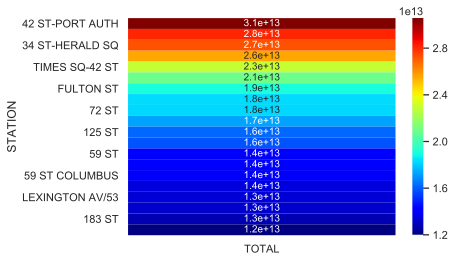

In [92]:
sns.heatmap(mta_top_20,cmap='jet',annot=True);

In [150]:
mta_cleaned_data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL
33003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
